## Практика 6: Дискримінантний аналіз

### Приклад 8.2, Таблиця  8.1
У розв'язку використано наступне _[посилання.](https://rpubs.com/aaronsc32/classification-linear-discriminant-analysis)_

В цій Таблиці 8.1 наведені максимальна міцність $y_1$ і межа текучості $y_2$ для сталі, прокатаної при двох температур $T1$ та $T2$. 

In [1]:
Temp<-read.table("T8_1_STEEL.DAT")
Temp

V1,V2,V3
1,33,60
1,36,61
1,35,64
1,38,63
1,40,65
2,35,57
2,36,59
2,38,59
2,39,61
2,41,63


Розділимо на 2 групи по цим температурам.

In [2]:
Temp<-as.matrix(Temp)
Temp1<-Temp[1:5,2:3]
# Temp1
Temp2<-Temp[6:12,2:3] 
# Temp2

Зобразимо ці дані на площині (спочатку будуємо точки $T2$, потім добавляємо точки $T1$): 

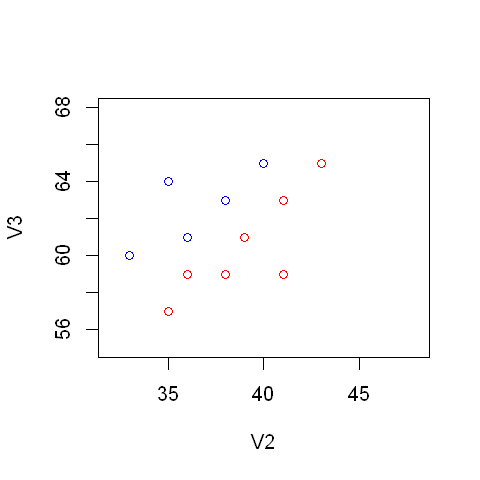

In [3]:
options(repr.plot.width=4, repr.plot.height=4)

plot(Temp2, col = "red", xlim=c(32,48), ylim=c(55,68))  
points(Temp1, col= "blue")                             

In [4]:
y1 <- c(mean(Temp1[,1]),mean(Temp1[,2]))  # the vector of means for  T1
y1
y2 <- c(mean(Temp2[,1]),mean(Temp2[,2])) # vector of means for  T2
y2

[1] 36.4 62.6

[1] 39.00000 60.42857

Обчислимо змішану коваріаційну матрицю (pooled covariance $S_{pl}$). Тут  $d1$ та  $d2$- кількості вимірювань 
для зразків, прокатаних при температурах $T_1$  та $T_2$, відповідно. 

In [5]:
S1<-cov(Temp1)
S2<-cov(Temp2)

d1<-length(Temp1[,1]) 
d2<-length(Temp2[,1])

Spl<-((d1-1)*S1+ (d2-1)*S2)/(d1+d2-2)  
Spl

,V2,V3
V2,7.92,5.680000
V3,5.68,6.291429


Тепер знайдемо вектор $a$ та дискримінантні функції $z_1$  та $z_2$  (нагадаємо, що $z_i = a'y_i$ )

In [6]:
a<-solve(Spl)%*%(y1-y2) 
z1<- Temp1 %*% a  
z2<- Temp2 %*% a

Розв'яжемо тепер наступну задачу класифікації. Ми розділимо вибірку на 2 групи, віднесши до перщої групи ті спостереження  $z$, де $z> \frac{z_1+z_2}{2}$. Ми застосували print(group[,1]), а не print(group),   для наочності  зображення. 

In [7]:
zmean<-0.5*(mean(z1)+mean(z2))
t<- as.matrix(Temp[,2:3])
z<-t%*%a 

group <- ifelse(z> zmean, 1, 2) 

print(group[,1])  

 [1] 1 1 1 1 1 2 2 2 2 2 2 2


Отже, початкове розбиття на групи вдале. 

## Приклад 8.4.1, Таблиця 8.3. 

 Table 8.3  Rencher,  Chapter 8, p. 295 

In [8]:
# install.packages("car")
library(car)
library(MASS)
library(dplyr)

Loading required package: carData
Warning message:
"package 'MASS' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:MASS':

    select

The following object is masked from 'package:car':

    recode

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



В таблиці знаходяться вимірювання параметрів шоломів  в залежності від того, до якої групи відноситься людина (гравець шкільної команди, гравець команди коледжа, або людина взагалі не грає в  футбол).  Для простоти, ми перейменуємо колонки цієї таблиці. 

In [9]:
Foot<-read.table('T8_3_FOOTBALL.DAT', col.names = c('Group', 'WDIM', 'CIRCUM', 'FBEYE', 'EYEHD', 'EARHD','JAW') )
head(Foot)

Group,WDIM,CIRCUM,FBEYE,EYEHD,EARHD,JAW
1,13.5,57.15,19.5,12.5,14.0,11
1,15.5,58.42,21.0,12.0,16.0,12
1,14.5,55.88,19.0,10.0,13.0,12
1,15.5,58.42,20.0,13.5,15.0,12
1,14.5,58.42,20.0,13.0,15.5,12
1,14.0,60.96,21.0,12.0,14.0,13


In [10]:
Foot<-read.table('T8_3_FOOTBALL.DAT', col.names = c('Group', 'V2', 'V3', 'V4', 'V5', 'V6','V7') )
head(Foot) 

Group,V2,V3,V4,V5,V6,V7
1,13.5,57.15,19.5,12.5,14.0,11
1,15.5,58.42,21.0,12.0,16.0,12
1,14.5,55.88,19.0,10.0,13.0,12
1,15.5,58.42,20.0,13.5,15.0,12
1,14.5,58.42,20.0,13.0,15.5,12
1,14.0,60.96,21.0,12.0,14.0,13


Визначимо залежні змінні (у вигляді матриці).

In [13]:
DepVar <- as.matrix(read.table('T8_3_FOOTBALL.DAT'))[,2:7]

Для того, щоб знайти дискримінантні функції, нам потрібно знайти власні числа та власні вектори матриці $E^{-1}H$. 

Наведемо приклад обчислення матриць $E$ та $H$ (див.   також пару про MANOVA). При цьому ми використаємо формули 
\begin{equation}\label{E}
E= \sum_{ij} y_{ij}y_{ij}'- \sum_{i=1}^k \frac{1}{n}\bar{y}_{i\cdot} \bar{y}_{i\cdot}'. 
\end{equation}
та  
\begin{equation}\label{H}
H= \sum_{i=1}^k \frac{1}{n}\bar{y}_{i\cdot} \bar{y}_{i\cdot}'- \frac{1}{kn}y_{\cdot\cdot}y_{\cdot\cdot}'
\end{equation}

Побудуємо перший доданок у матриці $E$. Для цього ми визначимо спочатку матрицю з нулів, і будемо її заповнювати, спочатку взявши скалярний добуток $y_{ij}y_{ij}'$, а потім просумувавши: 

In [14]:
A <- matrix(data = 0, nrow = 6, ncol = 6)     

for (i in 1:90) {
  A<- A+ DepVar[i,]%*%t(DepVar[i,])
}
A

V2,V3,V4,V5,V6,V7
21383.84,80471.09,27603.35,15752.77,19354.57,16655.30
80471.09,303376.09,104064.45,59512.84,72975.87,62748.25
27603.35,104064.45,35716.09,20393.33,25031.63,21523.97
15752.77,59512.84,20393.33,11885.51,14376.49,12306.24
19354.57,72975.87,25031.63,14376.49,17623.63,15092.98
16655.30,62748.25,21523.97,12306.24,15092.98,13005.66


Побудуємо тепер другий доданок. Спочатку ми будуємо  матрицю  що складається з нулів і заповнюємо її сумами по групам елеметнами $\bar{y}_{i\cdot}$, $i=1,2,3$. 

In [15]:
g = matrix(data = 0, nrow = 3, ncol = 6)
g[1,] = colSums(DepVar[1 : 30,])
g[2,] = colSums(DepVar[31:60,])
g[3,] = colSums(DepVar[61:90,])
g

456.0,1768.11,603.25,392.5,442.0,368.0
462.6,1721.39,594.10,302.4,403.6,358.3
467.4,1733.10,594.30,328.4,410.9,354.1


Потім ми будуємо скалярний добуток цих матриць та просумуємо: 

In [16]:
B = matrix(data = 0, nrow = 6, ncol = 6)

for (i in 1:3){
B <- B+ g[i,]%*% t(g[i,])
} 
B

640397.5,2412624,827688.5,472364.4,580312.0,499063.9
2412624.1,9093032,3119271.5,1783681.6,2188388.4,1881129.2
827688.5,3119271,1070057.9,611599.6,750613.1,645303.7
472364.4,1783682,611599.6,353348.6,430473.2,369076.4
580312.0,2188388,750613.1,430473.2,527095.8,452765.6
499063.9,1881129,645303.7,369076.4,452765.6,389189.7


Якщо розділити матрицю на кількість елементів у групі (тобто 30), ми отримаємо другий доданок в $E$.  Отже,  

In [17]:
E = A- B/30
E

V2,V3,V4,V5,V6,V7
37.2560,50.28120,13.739000,7.290000,10.8360000,19.8360000
50.2812,275.01513,88.737783,56.785300,29.5855333,43.9434333
13.7390,88.73778,47.497083,6.682167,11.1873333,13.8430000
7.2900,56.78530,6.682167,107.224333,27.3833333,3.6946667
10.8360,29.58553,11.187333,27.383333,53.7710000,0.7943333
19.8360,43.94343,13.843000,3.694667,0.7943333,32.6700000


Тепер неважко отримати матрицю $H$.  Перший доданок в $H$ ми вже знайшли. 
Щоб знайти другий, нам залишилось знайти $y_{\cdot\cdot}$, взяти скалярний добуток,  просумувати  і розділити на $kn=90$. 

In [18]:
D <- colSums(g) %*% t(colSums(g))
H = B/30 - D/90
H

2.1840,-7.236200,-1.794000,-13.34000,-6.366000,-2.696000
-7.2362,39.395362,8.257439,75.08970,32.981578,9.896011
-1.7940,8.257439,1.820722,15.59233,7.012944,2.359111
-13.3400,75.089700,15.592333,143.36467,62.701667,18.397333
-6.3660,32.981578,7.012944,62.70167,27.722889,8.601222
-2.6960,9.896011,2.359111,18.39733,8.601222,3.388222


Отримаємо власні числа та власні вектори матриці $E^{-1}H$: 

In [20]:
eigen(solve(E)%*%H)

eigen() decomposition
$values
[1]  1.917763e+00  1.159315e-01 -6.016607e-13  4.961369e-13 -4.701334e-14
[6]  1.610750e-14

$vectors
             [,1]          [,2]        [,3]        [,4]        [,5]        [,6]
[1,] -0.630931115 -0.6450303875 -0.32620933  0.12374657  0.44434437 -0.55135467
[2,]  0.002421392  0.0002350502  0.69125103 -0.27136788 -0.08458338  0.03270498
[3,]  0.004283894  0.0131216785 -0.44072729  0.94235801  0.14296416  0.18510138
[4,]  0.430733105 -0.2477230487 -0.31286614  0.08041750  0.21058236  0.26204102
[5,]  0.335522189  0.1760307761  0.03050719 -0.03022323 -0.52020983 -0.74309833
[6,]  0.551176528  0.7010064354 -0.35028993 -0.12500887  0.67823431 -0.19953765


Перевіримо, яку частку складають 2 перші власні числа.

In [21]:
lam1 = eigen(solve(E)%*%H)$values[1]
lam2 = eigen(solve(E)%*%H)$values[2]
sum_lam = sum(eigen(solve(E)%*%H)$values)
round(lam1/sum_lam,4)
round(lam2/sum_lam,4)

[1] 0.943

[1] 0.057

Отже, навіть однієї дискримінантної функції досить, щоб адекватно розділити вибірку на групи. 
Знайдемо власні вектори $E^{-1}H$. 

In [22]:
a1 = round(eigen(solve(E)%*%H)$vectors[,1],3)
a2 = round(eigen(solve(E)%*%H)$vectors[,2],3)

Звпишемо тепер нашу вибірку в нових координатах. 

In [23]:
y11<-  DepVar[1:30,]%*%a1
y12<- DepVar[1:30,]%*%a2


y21<-  DepVar[31:60,]%*%a1
y22<- DepVar[31:60,]%*%a2

y31<-  DepVar[61:90,]%*%a1
y32<- DepVar[61:90,]%*%a2

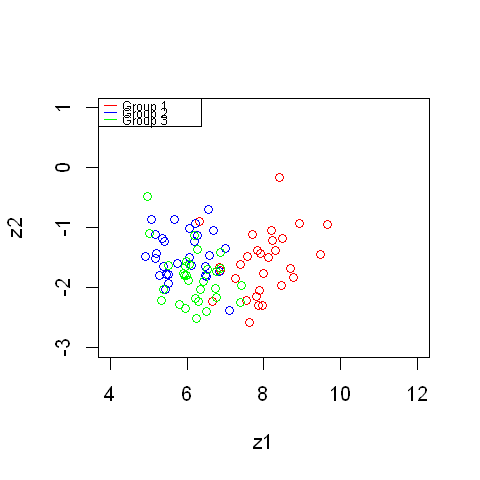

In [24]:
# dev.new(width=4, height=2, unit="in")
# windows(width=10, height=8)
plot(y11,y12, col = "red", xlim= c(4,12), ylim=c(-3,1), xlab="z1", ylab="z2")
points(y21,y22, col= "blue")
points(y31,y32,col="green")
legend("topleft", legend=c("Group 1", "Group 2","Group 3" ),
       col=c("red", "blue", "green"),lty=1, text.width = 2, cex = 0.65)

Застосуємо тепер вбудовані функції. Спочатку ми проведемо групування по першому стовбчику. Потім застосуємо функцію lda (linear discriminant analysis)

In [25]:
Foot$Group <- as.factor(Foot$Group)
lda1<-lda(Foot$Group~., data=Foot) 
lda1

Call:
lda(Foot$Group ~ ., data = Foot)

Prior probabilities of groups:
        1         2         3 
0.3333333 0.3333333 0.3333333 

Group means:
     V2       V3       V4       V5       V6       V7
1 15.20 58.93700 20.10833 13.08333 14.73333 12.26667
2 15.42 57.37967 19.80333 10.08000 13.45333 11.94333
3 15.58 57.77000 19.81000 10.94667 13.69667 11.80333

Coefficients of linear discriminants:
            LD1           LD2
V2  0.948423100  1.4067750094
V3 -0.003639865 -0.0005126312
V4 -0.006439599 -0.0286176430
V5 -0.647483088  0.5402700415
V6 -0.504360916 -0.3839132257
V7 -0.828535064 -1.5288556226

Proportion of trace:
  LD1   LD2 
0.943 0.057 

Подивитися  атрібути цієї  функції можна наступним чином: 

In [26]:
attributes(lda1)

$names
 [1] "prior"   "counts"  "means"   "scaling" "lev"     "svd"     "N"      
 [8] "call"    "terms"   "xlevels"

$class
[1] "lda"

Викликати власні вектори можна наступним чином: 

In [27]:
lda1$scaling  
# lda1$scaling[,1] 

,LD1,LD2
V2,0.948423100,1.4067750094
V3,-0.003639865,-0.0005126312
V4,-0.006439599,-0.0286176430
V5,-0.647483088,0.5402700415
V6,-0.504360916,-0.3839132257
V7,-0.828535064,-1.5288556226


Це-ненормовані власні вкктори. Нoрмування дасть нам як раз вектори $a1$ і $a2$, знайдені віще:

In [28]:
b1<- as.vector(lda1$scaling[,1])
b2<- as.vector(lda1$scaling[,2])
b1/(sqrt(sum(b1^2)))  

[1]  0.630931115 -0.002421392 -0.004283894 -0.430733105 -0.335522189
[6] -0.551176528

Як ми бачимо, отримали як раз вектор $a1$. 

В координатах $b1$ і $b2$ картинка розділення на групи схожа: 

In [29]:
w11<-  DepVar[1:30,]%*%b1
w12<- DepVar[1:30,]%*%b2


w21<-  DepVar[31:60,]%*%b1
w22<- DepVar[31:60,]%*%b2

w31<-  DepVar[61:90,]%*%b1
w32<- DepVar[61:90,]%*%b2

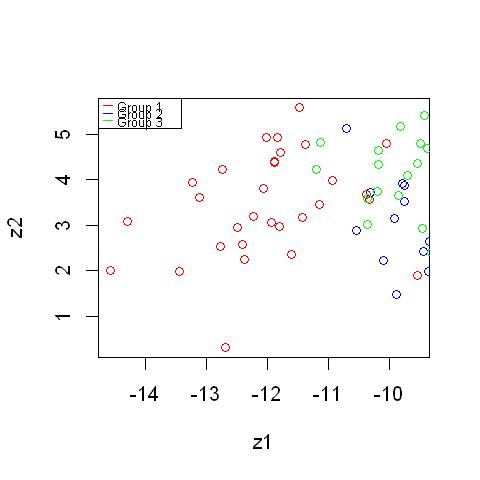

In [30]:
windows(width=10, height=8)
plot(w11,w12, col = "red",  xlab="z1", ylab="z2")
points(w21,w22, col= "blue")
points(w31,w32,col="green")
legend("topleft", legend=c("Group 1", "Group 2","Group 3" ),
       col=c("red", "blue", "green"),lty=1, cex = 0.65, text.width = 1)

Більше  почитати можна  тут:

https://www.r-bloggers.com/2021/05/linear-discriminant-analysis-in-r/

https://www.r-bloggers.com/2016/12/discriminant-analysis-of-several-groups/